### Tarea 9.10

Valentina Martínez Garrido 20925164-7

Considere los siguientes datos:

|$x$|$f(x)$|$\sigma$|
|-|-|-|
|$0.1$| $0.280$ |$0.1$|
|$0.2$| $0.472$ |$0.07$|
|$0.3$| $0.686$ |$0.05$|
|$0.4$| $0.850$ |$0.1$|
|$0.5$| $1.263$ |$0.03$|
|$0.6$| $1.576$ |$0.01$|
|$0.7$| $1.894$ |$0.01$|

Use scipy para ajustar los siguientes modelos:

* $a_1 x$
* $a_1 x + a_2 x^2$
* $a_o + a_1 x + a_2 x^2$

¿Cuál modelo describe mejor los datos? ¿Por qué?

Ahora repita lo mismo con los siguientes datos:

|$x$|$f(x)$|$\sigma$|
|-|-|-|
|$0.1$| $-1.36$ |$2.0$|
|$0.2$| $0.20$ |$1.4$|
|$0.3$| $3.01$ |$1.0$|
|$0.4$| $0.30$ |$2.0$|
|$0.5$| $1.11$ |$0.6$|
|$0.6$| $1.52$ |$0.2$|
|$0.7$| $2.09$ |$0.2$|

Ambos datos fueron generados a partir de la misma función $f$. Explique por qué cambian los resultados.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [21]:
#Datos primer conjunto, entregado
x_1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
f_x1 = np.array([0.280, 0.472, 0.686, 0.850, 1.263, 1.576, 1.894])
sigma_1 = ([0.1, 0.07, 0.05, 0.1, 0.03, 0.01, 0.01])

In [22]:
#Datos segundo conjunto, entregado
x_2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
f_x2 = np.array([-1.36, 0.20, 3.01, 0.30, 1.11, 1.52, 2.09])
sigma_2 = np.array([2.0, 1.4, 1.0, 2.0, 0.6, 0.2, 0.2])


In [23]:
#Definimos modelos,entregados
def modelo_1(x, a1):
  return a1 * x

def modelo_2(x, a1, a2):
  return a1 * x +a2 * x**2

def modelo_3(x, a0, a1, a2):
  return a0 + a1 * x + a2 * x**2

In [35]:
# Función para ajustar y graficar
def ajustar_modelos(x, y, sigma, modelos, colores, titulo):
    plt.errorbar(x, y, yerr=sigma, fmt='o', label='Datos', capsize=5)
    x_vals = np.linspace(min(x), max(x), 100)

    for modelo, color in zip(modelos, colores):
        popt, _ = curve_fit(modelo, x, y, sigma=sigma, absolute_sigma=True)
        y_fit = modelo(x_vals, *popt)
        plt.plot(x_vals, y_fit, color=color, label=f"{modelo.__name__}")

Resultados para el primer conjunto de datos:


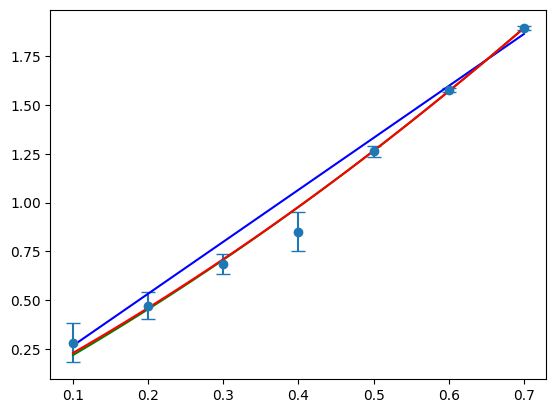

In [36]:
#Lista de modelos
modelos = [modelo_1, modelo_2, modelo_3]
colores = ['blue', 'green', 'red']  # Asignación de colores

# Ajuste y gráfica para el primer conjunto de datos
print("Resultados para el primer conjunto de datos:")
ajustar_modelos(x_1, f_x1, sigma_1, modelos, colores, "Primer Conjunto de Datos")


Resultados para el segundo conjunto de datos:


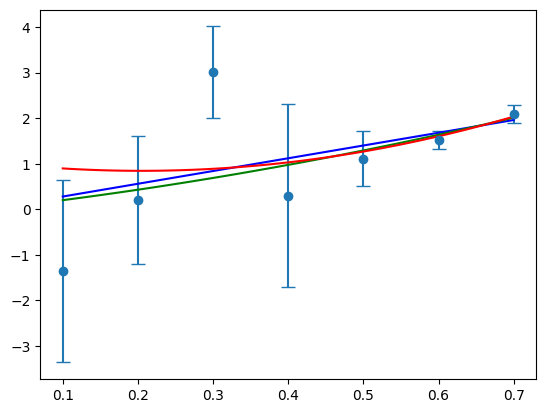

In [37]:
# Ajuste y gráfica para el segundo conjunto de datos
print("Resultados para el segundo conjunto de datos:")
ajustar_modelos(x_2, f_x2, sigma_2, modelos, colores, "Segundo Conjunto de Datos")

1.- el modelo lineal ($a_1 x$), es el más simple, lo cual es probable que no capture las posibles curvas en los datos
el modelo cuadratico ($a_1x + a_2 x^2$), permite capturar una ligera curva, ya que mejora el ajuste
modelo cuadratico con constante ($a_o + a_1 x + a_2 x^2$) tiene una flexibilidad adicional por la constante, la cual puede ser inecesaria por que no hay desplazamiento vertical significativo


Por lo cual el modelo cuadratico describe mejor el conjunto de datos, ya que captura la curvatura sin sobreajustar


2.- La misma función generada puede producir diferente resultados cuando esta se ajusta a datos con distintas caracteristicas de incertidumbre y dispersion, ya que los modelos interpretan y ajustan los datos mediante el ruido y variacion que puedan estar presentes en cada conjunto